# Andrei Muravev


 ### - Context:
 
* [Import Datasets and packages](#1.Imports)
* [Data cleaning](#2.Data-cleaning)
* [Checking Outliers](#3.Checking-Outliers)
* [Exploratory Data Analysis](#4.Exploratory-Data-Analysis)
* [Splitting Some features and testing them in a model using dummies](#5.Dummies)
* [Model Preparation](#6.Model-Preparation)
* [Modeling](#7.Modeling)
* [Lasso Model](#8.Lasso-Model)
* [Ridge Model](#9.Ridge-Model)
* [Kaggle Predictions](#10.Kaggle-Predictions)
* [Conclusion](#11.Conclusion)





## 1.Imports



In [2]:
# Import datasets and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression,\
                                 Lasso, Ridge

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Load train.csv equal to df
# Load test.csv equal to kaggledf

df_train = pd.read_csv('./datasets/train.csv')
df= df_train
df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [4]:
kaggledf = pd.read_csv('datasets/test.csv')

In [5]:
kaggledf.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD



## 2.Data cleaning


In [6]:
# Make all columns lower case on kaggledf and df

df.columns = [columns.lower().replace(' ', '_') for columns in df.columns]
kaggledf.columns = [columns.lower().replace(' ','_') for columns in kaggledf.columns]


In [7]:
# rename id columns on kaggle df

kaggledf.rename(columns = {'id':'Id'}, inplace = True)

In [8]:
# drop emptry columns on kaggledf and df

df.dropna(axis = 1, thresh = df.shape[0]/4, inplace = True)
kaggledf.dropna(axis = 1, thresh = kaggledf.shape[0]/4, inplace = True)

In [9]:
# drop columns manually on kaggledf and df

df.drop(columns=['fireplace_qu'], inplace = True)
kaggledf.drop(columns=['fireplace_qu'], inplace = True)

In [10]:
# check for changes

df.head(1)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500


In [11]:
#Replace all nulls with the mode or mean

df['mas_vnr_type']=df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0])
df['lot_frontage']=df['lot_frontage'].fillna(df['lot_frontage'].mean())
df['mas_vnr_area']=df['mas_vnr_area'].fillna(df['mas_vnr_area'].mode()[0])

   
df['garage_qual'] = df['garage_qual'].fillna(df['garage_qual'].mode()[0])
df['garage_cond'] = df['garage_cond'].fillna(df['garage_cond'].mode()[0])
df['garage_finish'] = df['garage_finish'].fillna(df['garage_finish'].mode()[0])
df['garage_type']=df['garage_type'].fillna(df['garage_type'].mode()[0])
df['garage_cars']=df['garage_cars'].fillna(df['garage_cars'].mean())  
df['garage_yr_blt']=df['garage_yr_blt'].fillna(df['garage_yr_blt']).mean()
df['garage_area']=df['garage_area'].fillna(df['garage_area'].mean()) 

df['bsmt_exposure']=df['bsmt_exposure'].fillna(df['bsmt_exposure'].mode()[0])
df['bsmt_qual']=df['bsmt_qual'].fillna(df['bsmt_qual'].mode()[0])
df['bsmt_cond']=df['bsmt_cond'].fillna(df['bsmt_cond'].mode()[0])
df['bsmtfin_type_2']=df['bsmtfin_type_2'].fillna(df['bsmtfin_type_2'].mode()[0])
df['bsmtfin_type_1']=df['bsmtfin_type_1'].fillna(df['bsmtfin_type_1'].mode()[0])
df['bsmt_full_bath']=df['bsmt_full_bath'].fillna(df['bsmt_full_bath'].mean())
df['bsmt_half_bath']=df['bsmt_half_bath'].fillna(df['bsmt_half_bath'].mean()) 
df['bsmt_unf_sf']=df['bsmt_unf_sf'].fillna(df['bsmt_unf_sf'].mean())
df['bsmtfin_sf_2']=df['bsmtfin_sf_2'].fillna(df['bsmtfin_sf_2'].mean()) 
df['bsmtfin_sf_1']=df['bsmtfin_sf_1'].fillna(df['bsmtfin_sf_1'].mean()) 
df['total_bsmt_sf']=df['total_bsmt_sf'].fillna(df['total_bsmt_sf'].mean())



#Replace all nulls with mode kaggledf

kaggledf['lot_frontage']=kaggledf['lot_frontage'].fillna(df['lot_frontage'].mean())
kaggledf['garage_qual'] = kaggledf['garage_qual'].fillna(df['garage_qual'].mode()[0])
kaggledf['garage_cond'] = kaggledf['garage_cond'].fillna(df['garage_cond'].mode()[0])
kaggledf['garage_finish'] = kaggledf['garage_finish'].fillna(df['garage_finish'].mode()[0])
kaggledf['garage_type']=kaggledf['garage_type'].fillna(df['garage_type'].mode()[0])
kaggledf['bsmtfin_type_2']=kaggledf['bsmtfin_type_2'].fillna(df['bsmtfin_type_2'].mode()[0])
kaggledf['bsmtfin_type_1']=kaggledf['bsmtfin_type_1'].fillna(df['bsmtfin_type_1'].mode()[0])
kaggledf['bsmt_exposure']=kaggledf['bsmt_exposure'].fillna(df['bsmt_exposure'].mode()[0])
kaggledf['bsmt_cond']=kaggledf['bsmt_cond'].fillna(df['bsmt_cond'].mode()[0])
kaggledf['bsmt_qual']=kaggledf['bsmt_qual'].fillna(df['bsmt_qual'].mode()[0])
kaggledf['mas_vnr_type']=kaggledf['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0])
kaggledf['mas_vnr_area']=kaggledf['mas_vnr_area'].fillna(df['mas_vnr_area'].mode()[0])
kaggledf['electrical']=kaggledf['electrical'].fillna(df['electrical'].mode)

# # replace nulls with mean

kaggledf['garage_yr_blt']=kaggledf['garage_yr_blt'].fillna(df['garage_yr_blt'].mean())
kaggledf['lot_frontage']=kaggledf['lot_frontage'].fillna(df['lot_frontage'].mean())

In [12]:
# This code shows all nulls in descending order, if this cell is empty, it means no nulls in dataframe

for col, nulls in    df.isnull()\
                     .sum()\
                     .sort_values(ascending = False)\
                     .to_frame()\
                     .iterrows():
    
    if nulls[0]:
        print(f'{col}: {nulls[0]}')

In [13]:
#Convert float to integer

df['garage_area']=df['garage_area'].astype(int)
df['garage_yr_blt']=df['garage_yr_blt'].astype(int)
df['total_bsmt_sf']=df['total_bsmt_sf'].astype(int)
df['bsmt_unf_sf']=df['bsmt_unf_sf'].astype(int)
df['bsmtfin_sf_2']=df['bsmtfin_sf_2'].astype(int)
df['bsmtfin_sf_1']=df['bsmtfin_sf_1'].astype(int)
df['mas_vnr_area']=df['mas_vnr_area'].astype(int)
df['lot_frontage']=df['lot_frontage'].astype(int)
df['garage_cars']=df['garage_cars'].astype(int)
df['bsmt_full_bath']=df['bsmt_full_bath'].astype(int)
df['bsmt_half_bath']=df['bsmt_half_bath'].astype(int)

## 3.Checking Outliers

In [14]:
# Check the skew. It is mostly positive

df.skew().sort_values().tail(5)

lot_area            9.204950
low_qual_fin_sf    11.501289
3ssn_porch         11.827201
pool_area          16.700228
misc_val           20.657398
dtype: float64

In [15]:
# This code runs accross all numeric columns and checks outliers that are 3 times less and 6 times more than stdv
# Results are printed below

def outliers(s):
    mean, std = s.mean(), s.std()
    lower, upper = mean - 3 * std, mean + 6 * std
    a, b = (s < lower).sum(), (s > upper).sum()
    return pd.Series((a, b, a+b), index=("min_outlier", "max_outlier", "sum"))


df.select_dtypes(include='number').agg(outliers).T.sort_values('max_outlier').tail(30)


,min_outlier,max_outlier,sum
yr_sold,0,0,0
bsmt_full_bath,0,0,0
2nd_flr_sf,0,0,0
saleprice,0,0,0
overall_qual,4,0,4
pid,0,0,0
ms_subclass,0,0,0
bsmt_unf_sf,0,0,0
overall_cond,10,0,10
year_remod/add,0,0,0


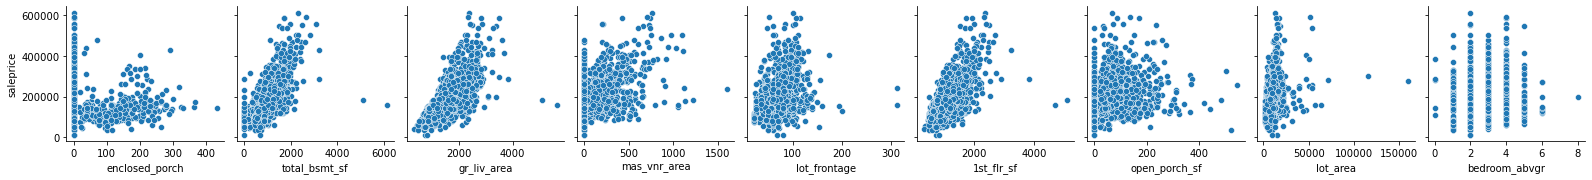

In [16]:
# Use pair plots for outlier's visualization 

sns.pairplot(df,x_vars=['enclosed_porch','total_bsmt_sf','gr_liv_area','mas_vnr_area','lot_frontage','1st_flr_sf','open_porch_sf','lot_area','bedroom_abvgr'], y_vars=['saleprice']);

In [17]:
# Use sort_value for analysis

df['lot_frontage'].sort_values().tail(3)

1875    200
1335    313
960     313
Name: lot_frontage, dtype: int32

In [18]:
# Use groupby for analysis

df[['3ssn_porch', 'saleprice']].sort_values('saleprice').max()

3ssn_porch       508
saleprice     611657
dtype: int64

After my analysis, it is clear that rows below are above normal distribution. 
This information would be used later if we need to focus on lot, porch or living areas:

- lot_area 471
- low_qual_fin_sf 828
- gr_liv_area 1885 960
- 3ssn_porch 508
- lot_frontage 1335
- 'bedroom_abvgr'


## 4.Exploratory Data Analysis


In [19]:
# Create a list of the best features for saleprice using correlation function

df.corr()['saleprice'][df.corr()['saleprice'].sort_values().abs()>0.5]

overall_qual      0.800207
year_built        0.571849
year_remod/add    0.550370
mas_vnr_area      0.503579
total_bsmt_sf     0.628670
1st_flr_sf        0.618486
gr_liv_area       0.697038
full_bath         0.537969
totrms_abvgrd     0.504014
garage_cars       0.648225
garage_area       0.650247
saleprice         1.000000
Name: saleprice, dtype: float64

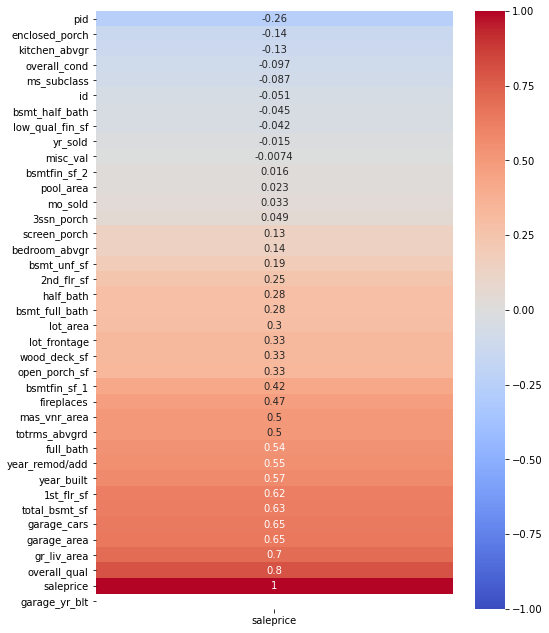

In [20]:
# Plot the heatmap for better visualization

plt.figure(figsize =(8,11))

sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice'), annot=True, cmap ='coolwarm', vmin=-1, vmax=1);

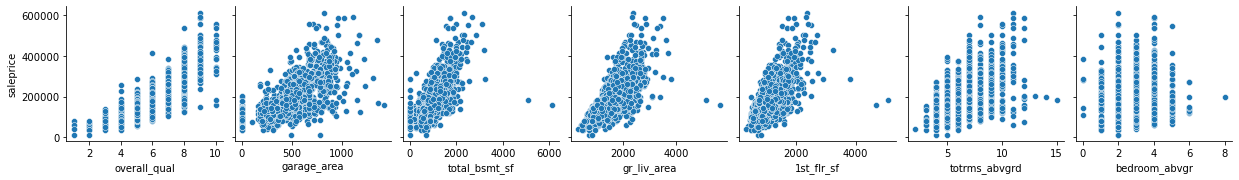

In [21]:
# Check the Pairplot of the best features

sns.pairplot(df,x_vars=['overall_qual','garage_area','total_bsmt_sf','gr_liv_area','1st_flr_sf','totrms_abvgrd','bedroom_abvgr'], y_vars=['saleprice']);

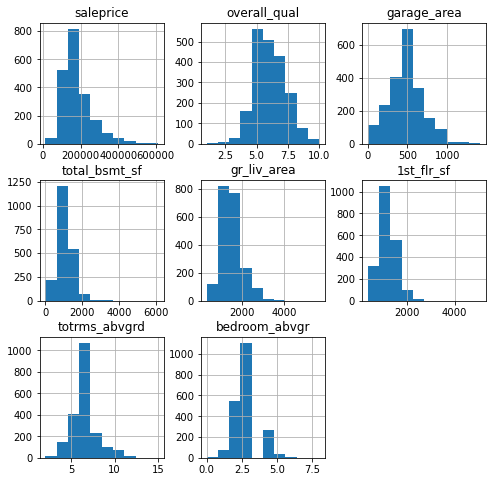

In [22]:
# Load all numeric features as histogram and choose those that look similar to saleprice histogram

df[['saleprice','overall_qual','garage_area','total_bsmt_sf','gr_liv_area','1st_flr_sf','totrms_abvgrd','bedroom_abvgr']].hist(figsize=(8,8));

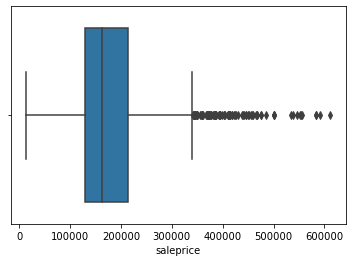

In [23]:
# Boxplot 3 strongest features to check how  close they are. Saleprice first

sns.boxplot(x=df['saleprice']);

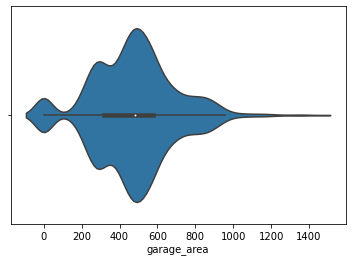

In [24]:
#Garage area has very close shape to saleprice

sns.violinplot(x=df['garage_area']);

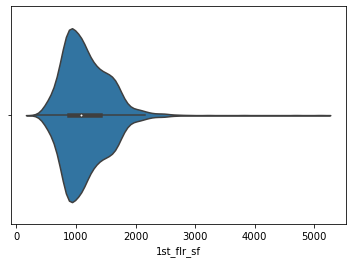

In [25]:
# 1st floor square feet is close to saleprice, but has a little skew to left side

sns.violinplot(x=df['1st_flr_sf']);

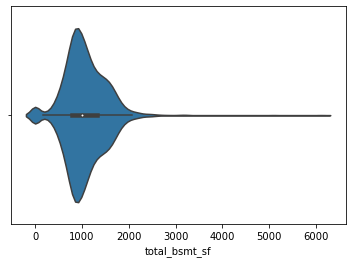

In [26]:
# total basement square feet is very similar to the 1st floor sg_ft

sns.violinplot(x=df['total_bsmt_sf']);

After EDA next 6 features were chosen as the best fit to saleprice:

- 'overall_qual'
- 'garage_area'
- 'total_bsmt_sf'
- 'gr_liv_area'
- '1st_flr_sf'
- 'totrms_abvgrd'

Additional features would be considered later to improve my model's score:
- 'bedroom_abvgr'
- 'fireplaces'
- 'full_bath'

In [27]:
#Save train dataset to csv

df.to_csv('clean_df.csv')

## 5.Dummies

In [28]:
# Select columns with categorical features

df_cat_f = df.select_dtypes(include=['object'])
kaggledf_cat_f = kaggledf.select_dtypes(include=['object'])


In [29]:
# Split full_bath column using dummies

df_bath = pd.get_dummies(df, columns = ['full_bath'])
kaggledf_bath = pd.get_dummies(kaggledf, columns = ['full_bath'])


In [30]:
# Split basement quality using dummies

bas = pd.get_dummies(df,columns = ['bsmt_qual'])
kaggledf_bas = pd.get_dummies(kaggledf,columns = ['bsmt_qual'])

df.drop(columns = ['bsmt_qual'], inplace= True)
kaggledf.drop(columns = ['bsmt_qual'], inplace= True)


In [31]:
# Create a new experimental dataframe only with dummies

df_dum = pd.get_dummies(df_cat_f)
kaggledf_dum = pd.get_dummies(kaggledf_cat_f)

In [32]:
# Add salesprice column to dammies dataframe to do analysis

df_dum.insert(loc=0, column = 'saleprice', value = df['saleprice'])

In [33]:
#Add full_bath features to df_dum and kaggledf_dum, plus drop full_dum columns

df_dum[['full_bath_0','full_bath_1','full_bath_2','full_bath_3','full_bath_4']] = df_bath[['full_bath_0','full_bath_1','full_bath_2','full_bath_3','full_bath_4']]
kaggledf_dum[['full_bath_0','full_bath_1','full_bath_2','full_bath_3','full_bath_4']] = df_bath[['full_bath_0','full_bath_1','full_bath_2','full_bath_3','full_bath_4']]

# Add basement qulities to dummie dataset
df_dum[['bsmt_qual_Gd','bsmt_qual_TA','bsmt_qual_Fa']]=bas[['bsmt_qual_Gd','bsmt_qual_TA','bsmt_qual_Fa']]
kaggledf_dum[['bsmt_qual_Gd','bsmt_qual_TA','bsmt_qual_Fa']]=bas[['bsmt_qual_Gd','bsmt_qual_TA','bsmt_qual_Fa']]



In [34]:
# Check for updates

df_dum.head(1)

,saleprice,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,...,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,full_bath_0,full_bath_1,full_bath_2,full_bath_3,full_bath_4
0,130500,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [35]:
# Check the correlation between saleprice and potential features, sort them and print

df_dum.corr()[['saleprice']].sort_values('saleprice', ascending = False).head(5)

,saleprice
saleprice,1.000000
bsmt_qual_Ex,0.586497
kitchen_qual_Ex,0.551284
foundation_PConc,0.529047
exter_qual_Ex,0.493861


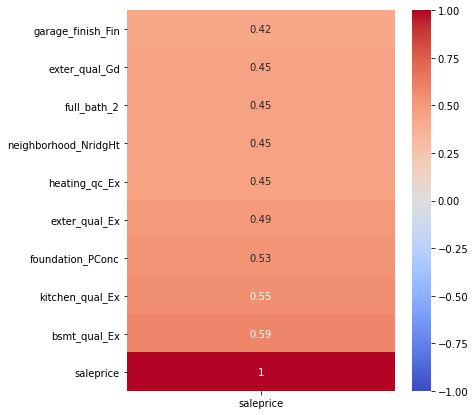

In [40]:
# Visialize best correlations

plt.figure(figsize=(6,7))

sns.heatmap(df_dum.corr()[['saleprice']].sort_values('saleprice').tail(10), annot=True, cmap='coolwarm', vmin=-1, vmax=1);


Following features have been chosen for analysys based on correlation between them and price:

- 'saleprice'
- 'neighborhood_Edwards','neighborhood_StoneBr', neighborhood_NridgHt
- 'garage_type_Attchd','garage_finish_Fin'
- 'central_air_Y'
- 'paved_drive_Y'
- 'kitchen_qual_Gd',kitchen_qual_Ex'
- 'mas_vnr_type_Stone'
- 'exterior_1st_VinylSd','exter_qual_Gd','exter_qual_Ex'
- 'sale_type_New'
- 'bsmt_exposure_Gd','bsmtfin_type_1_GLQ','bsmt_qual_Ex'
- 'foundation_PConc'
- 'heating_qc_Ex'
- 'full_bath_2'
- 'bsmt_qual_Gd'

After my reasearch and trying all features from the list next 7 were chosen as best performers
I added them to df and kaggledf datasets

- 'bsmt_qual_Ex'
- 'bsmtfin_type_1_GLQ'
- 'bsmt_exposure_Gd'
- 'exter_qual_Ex'
- 'kitchen_qual_Ex'
- 'neighborhood_NridgHt'
- 'central_air_Y'
-  'full_bath_2'
- 'bsmt_qual_Gd'

In [2969]:
# I decided to add the best columns from dummie dataframe to train and test dataframes

df[['bsmt_qual_Gd','full_bath_2','bsmt_qual_Ex','bsmtfin_type_1_GLQ','bsmt_exposure_Gd','exter_qual_Ex','kitchen_qual_Ex','neighborhood_NridgHt','central_air_Y']] =df_dum[['bsmt_qual_Gd','full_bath_2','bsmt_qual_Ex','bsmtfin_type_1_GLQ','bsmt_exposure_Gd','exter_qual_Ex','kitchen_qual_Ex','neighborhood_NridgHt','central_air_Y']]
kaggledf[['bsmt_qual_Gd','full_bath_2','bsmt_qual_Ex','bsmtfin_type_1_GLQ','bsmt_exposure_Gd','exter_qual_Ex','kitchen_qual_Ex','neighborhood_NridgHt','central_air_Y']] =kaggledf_dum[['bsmt_qual_Gd','full_bath_2','bsmt_qual_Ex','bsmtfin_type_1_GLQ','bsmt_exposure_Gd','exter_qual_Ex','kitchen_qual_Ex','neighborhood_NridgHt','central_air_Y']]

##### - Additional Research (neighborhood, kitchen qualities, bath, basement quality)

#### * Neighborhood

 Neighborhoods are very significant feature that impact the price of houses. In my exploration, I compared top 6 to choose what neighborhood is the best.
 After my analysis, NRidge had a bigger impcat to my model,it is also in top 6 in number of homes sold. 
 Even CollgCr, OldTown and Edwards are higher in numbers, they almost didn't changle my model 

In [39]:
df['neighborhood'].value_counts().head(7)

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Name: neighborhood, dtype: int64

In [2971]:
# Most expensive houses were also sold in NRidgHt. 

df_dum[['saleprice','neighborhood_NridgHt','neighborhood_CollgCr','neighborhood_Somerst','neighborhood_OldTown']].sort_values('saleprice').tail(5)

,saleprice,neighborhood_NridgHt,neighborhood_CollgCr,neighborhood_Somerst,neighborhood_OldTown
151,556581,0,0,0,0
1796,582933,1,0,0,0
1692,584500,0,0,0,0
1964,591587,0,0,0,0
1671,611657,1,0,0,0


#####  * Kitchen

In [2972]:
# Since kitchen quality has higher correlation with price, I wanted to explore how it impacts the price

df_dum[['saleprice','kitchen_qual_TA','kitchen_qual_Gd','kitchen_qual_Ex','kitchen_qual_Fa']].head(3)

,saleprice,kitchen_qual_TA,kitchen_qual_Gd,kitchen_qual_Ex,kitchen_qual_Fa
0,130500,0,1,0,0
1,220000,0,1,0,0
2,109000,0,1,0,0


In [2973]:
# Use different kitchen qualities and value_counts for analysis

df_dum[['kitchen_qual_Fa']].value_counts()

kitchen_qual_Fa
0                  2004
1                    47
dtype: int64

In [2974]:
# USe groupby and mean for analysis

df_dum.groupby('kitchen_qual_TA')['saleprice'].mean()

kitchen_qual_TA
0    225235.234064
1    139501.607450
Name: saleprice, dtype: float64

##### * Bath

In [2975]:
# Check the amount of houses sold with certain types of bath

# df_dum['full_bath_0'].value_counts()
#df_dum['full_bath_1'].value_counts()
df_dum['full_bath_2'].value_counts()
# df_dum['full_bath_3'].value_counts()
# df_dum['full_bath_4'].value_counts()



1    1096
0     955
Name: full_bath_2, dtype: int64

In [2976]:
df['bedroom_abvgr'].value_counts()

3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr, dtype: int64

###### * basement quality

In [2977]:
# Check the basement quality

df_dum[['bsmt_qual_Ex', 'bsmt_qual_Gd','bsmt_qual_TA']].value_counts()

bsmt_qual_Ex  bsmt_qual_Gd  bsmt_qual_TA
0             0             1               942
              1             0               864
1             0             0               184
0             0             0                61
dtype: int64

##### * My findings:

 - Most expensive houses were sold in NRidgHt. Nridght is the best neighborhood for  recommendations. It is in the top 6 by number of houses sold. Plus, it has the highest average price and the most expensive houses are sold in this neighborhood as well. Nridght has also higher impact on my model predictions.
 
 - The kitchen quality excellent is more attractive for people rather than fabulous based on average amount of houses sold and price. After trying to predict prices on my model, the excellent had bigger impact than good.
 
 - The most popular were houses with 2 baths -  1096, 2nd place 1bath - 900, others are less than 100
 
 - 864 homes were sold with basement quality good, but 184 with quality excellent



## 6.Model Preparation

In [2978]:
#Set X and y variables

features = ['overall_qual','garage_area','total_bsmt_sf','gr_liv_area','1st_flr_sf','totrms_abvgrd','bsmt_qual_Ex','bsmtfin_type_1_GLQ','bsmt_exposure_Gd','exter_qual_Ex','kitchen_qual_Ex','neighborhood_NridgHt','central_air_Y','fireplaces','full_bath_2','bedroom_abvgr','bsmt_qual_Gd']
X = df[features]
Xkaggle = kaggledf[features]

y = df['saleprice']



# Split dataset to train and set variables
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42)


# Instantiate Standard Scaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)
Xkaggle_sc = ss.transform(Xkaggle)

#### Next features were chosen as best price predictors after model preparation process:

- overall_qual
- garage_area
- total_bsmt_sf
- gr_liv_area
- 1st_flr_sf
- totrms_abvgrd
- bsmt_qual_Ex
- bsmtfin_type_1_GLQ
- bsmt_exposure_Gd
- exter_qual_Ex
- kitchen_qual_Ex
- neighborhood_NridgHt
- central_air_Y
- fireplaces
- full_bath_2
- bedroom_abvgr
- bsmt_qual_Gd



## 7.Modeling


#### - Linear Regression Model

In [2979]:
#Instantiate LinearRegression
#Fit model
#train score
#test score
#cross val score
#RMSE

lr=LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print('R2 training score', lr.score(X_train, y_train))
print('R2 testing score', lr.score(X_test,y_test))
print('cross_val_score', cross_val_score(lr,X_train,y_train,cv=10).mean())
print('RMSE', np.sqrt(mean_squared_error(pred,y_test)))

R2 training score 0.8244442201903421
R2 testing score 0.8814975614899299
cross_val_score 0.8035029099593949
RMSE 26974.20810800531


## 8.Lasso Model

In [2981]:
#Set Lasso
#fit model
#train score
# test score

lasso = Lasso()
lasso.fit(X_train_sc, y_train)

lasso_pred = lasso.predict(X_test_sc)

print('R2 training score', lasso.score(X_train_sc, y_train))
print('R2 testing score', lasso.score(X_test_sc,y_test))
print('MSE', mean_squared_error(y_test, lasso_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,lasso_pred)))

R2 training score 0.824444216603041
R2 testing score 0.8815016509906164
MSE 727582793.4186295
RMSE 26973.74266613051


## 9.Ridge Model

In [2982]:
# Set, Fit and Score Ridge.

ridge = Ridge()
ridge.fit(X_train_sc, y_train)

ridge_pred = ridge.predict(X_test_sc)

print('R2 training score', ridge.score(X_train_sc, y_train))
print('R2 testing score', ridge.score(X_test_sc, y_test))
print('MSE', mean_squared_error(y_test, ridge_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test,ridge_pred)))

R2 training score 0.8244441147167652
R2 testing score 0.881480741644488
MSE 727711177.3209529
RMSE 26976.122355167226


After using all 3 models. At the beginning, the score was almost the same and sometimes Linear Regression would win.
But, as I added more and more features, Lasso's score started to rise. And, I will use Lasso for my Kaggle predictions.
I've included all my scores explanations to my recommendation section

## 10.Kaggle Predictions

In [2984]:
# Run predictions on the best model.

kaggle_pred=lasso.predict(Xkaggle_sc)

In [2985]:
#Create SalePrice column and fill it out with kaggle_pred 

kaggledf['SalePrice'] = kaggle_pred


In [2986]:
#Create a kuggle submission variable from ID and SalePrice

kaggle_sub = kaggledf[['Id','SalePrice']]

In [2991]:
# Save to csv

kaggle_sub.to_csv('Submissions/Submissions_Super_Final_Andrei.csv', index=False)

### Plot Models

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


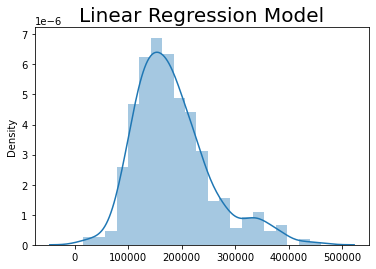

In [2992]:
# I wanted to plot all 3 models to check how well they fit to the saleprice

sns.distplot(pred)
plt.title('Linear Regression Model',fontsize = 20);

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


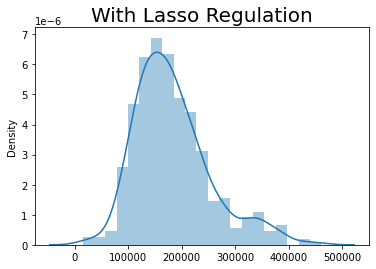

In [2993]:
sns.distplot(lasso_pred)
plt.title('With Lasso Regulation',fontsize = 20);

C:\Users\Andrei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'With Ridge Regulation')

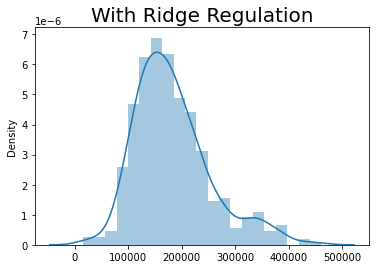

In [2994]:
sns.distplot(ridge_pred)
plt.title('With Ridge Regulation', fontsize = 20)

All three models look very good to the price prediction

## 11.Conclusion

The following observations could be made:

1. After exploring correlations between sale price, features and a heatmap, I could tell that although people are looking for the overall quality in houses and the price will definitely increase with increase in quality, some other factors will affect price as well. For example, the size of a garage in sq ft and in car capacity would on average increase the price of a home by 0.7.

2. Based on dummies analysis: the most expensive houses were sold in Northridge. It is in a top 6 by number of houses sold and has the highest average price. Also, Northridge has higher impact on my model predictions compare with others.

3. Looking at charts using the value counts and average prices, excellent quality kitchens are more attractive for people rather than fabulous. After trying to predict prices on my model, the excellent quality had higher impact than good. 

4. Homes with basement quality good were sold in 4 times more than homes with basement quality excellent. Both features increased my model accuracy. A good performer on my model was "basement finished area" with rating 1.

5. Majority of homes were sold: 
  - with 3 bedroom(1108), 2 bedrooms(544), 4 bedrooms(265)
  - with 2 baths  (1096), 1 bath    (900), others are less than 100   

6. To make a price prediction, I've used 3 different models:  Linear Regression, Lasso and Ridge. At the beginning, the score was almost the same and sometimes Linear Regression would win. But, as I added more and more features, Lasso's score started to rise. And, I will use Lasso to make future predictions and use this model for Kaggle competition.
 
7. At the beginning of my modeling, only 6 best features were used choosen from pairplots and heatmap. My model fitted my data with %82 accuracy. And, my errors of predicted price would fluctuate in a range of 32800. After dummies split, I included 7 other dummy's features and a few numeric columns.  The accuracy of my model  increased to %88, and errors of  predicted price dropped to 26900. 

 
##### To summarize everything in one sentence, I'd recommend 3-bedroom houses with two baths in Northridge neighborhood with excellent kitchen quality, paying particular attention to special attributes such as garage and basement sq ft. 

 In the future, more research could be done in exploring  infrastructure and areas where these homes were sold. For example, effect of schools, public transportation, hospitals, parks, distance from downtown and other features.